# Continuous Control

---

Congratulations for completing the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program!  In this notebook, you will learn how to control an agent in a more challenging environment, where the goal is to train a creature with four arms to walk forward.  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Crawler.app"`
- **Windows** (x86): `"path/to/Crawler_Windows_x86/Crawler.exe"`
- **Windows** (x86_64): `"path/to/Crawler_Windows_x86_64/Crawler.exe"`
- **Linux** (x86): `"path/to/Crawler_Linux/Crawler.x86"`
- **Linux** (x86_64): `"path/to/Crawler_Linux/Crawler.x86_64"`
- **Linux** (x86, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86"`
- **Linux** (x86_64, headless): `"path/to/Crawler_Linux_NoVis/Crawler.x86_64"`

For instance, if you are using a Mac, then you downloaded `Crawler.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Crawler.app")
```

In [2]:
env = UnityEnvironment(file_name='d:/DRL/app/Crawler_Windows_x86_64/Crawler.exe')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: CrawlerBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 129
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 20
        Vector Action descriptions: , , , , , , , , , , , , , , , , , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 12
Size of each action: 20
There are 12 agents. Each observes a state with length: 129
The state for the first agent looks like: [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  2.25000000e+00
  1.00000000e+00  0.00000000e+00  1.78813934e-07  0.00000000e+00
  1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  6.06093168e-01 -1.42857209e-01 -6.06078804e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.33339906e+00 -1.42857209e-01
 -1.33341408e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -6.0609

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.8618722101673484


When finished, you can close the environment.

### 4. Take Actions with DDPG

In [5]:
import torch
from collections import deque
from ddpg_agent import Agent
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def ddpg(n_episodes=18000, max_t=1000,target_score=15):
    """ Deep Deterministic Policy Gradients
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores_window = deque(maxlen=100)
    scores = np.zeros(num_agents)
    scores_episode = []
    
    agents =[] 
    
    for i in range(num_agents):
        agents.append(Agent(state_size, action_size, random_seed=0))
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        
        for agent in agents:
            agent.reset()
            
        scores = np.zeros(num_agents)
            
        for t in range(max_t):
            actions = np.array([agents[i].act(states[i]) for i in range(num_agents)])
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations     # get the next state
            rewards = env_info.rewards                     # get the reward
            dones = env_info.local_done        
            
            for i in range(num_agents):
                agents[i].step(t,states[i], actions[i], rewards[i], next_states[i], dones[i]) 
 
            states = next_states
            scores += rewards
            if t % 20:
                print('\rTimestep {}\tScore: {:.2f}\tmin: {:.2f}\tmax: {:.2f}'
                      .format(t, np.mean(scores), np.min(scores), np.max(scores)), end="") 
            if np.any(dones):
                break 
        score = np.mean(scores)
        scores_window.append(score)       # save most recent score
        scores_episode.append(score)

        print('\rEpisode {}\tScore: {:.2f}\tAverage Score: {:.2f}'.format(i_episode, score, np.mean(scores_window)), end="\n")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=target_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            torch.save(Agent.actor_local.state_dict(), 'models/crawler_actor.pth')
            torch.save(Agent.critic_local.state_dict(), 'models/crawler_critic.pth')
            break
            
    return scores_episode

scores = ddpg()


Initialising ReplayBuffer
Episode 1	Score: 2.01	Average Score: 2.0121
Episode 2	Score: 1.19	Average Score: 1.6054
Episode 3	Score: 2.38	Average Score: 1.8685
Episode 4	Score: 1.91	Average Score: 1.8730
Episode 5	Score: 2.08	Average Score: 1.9271
Episode 6	Score: 2.20	Average Score: 1.9649
Episode 7	Score: 2.26	Average Score: 2.0080
Episode 8	Score: 2.15	Average Score: 2.0272
Episode 9	Score: 2.04	Average Score: 2.0243
Episode 10	Score: 2.25	Average Score: 2.055
Episode 11	Score: 2.14	Average Score: 2.067
Episode 12	Score: 2.29	Average Score: 2.082
Episode 13	Score: 2.10	Average Score: 2.087
Episode 14	Score: 2.20	Average Score: 2.098
Episode 15	Score: 1.98	Average Score: 2.080
Episode 16	Score: 2.26	Average Score: 2.095
Episode 17	Score: 2.22	Average Score: 2.105
Episode 18	Score: 2.07	Average Score: 2.102
Episode 19	Score: 2.47	Average Score: 2.125
Episode 20	Score: 2.09	Average Score: 2.125
Episode 21	Score: 2.23	Average Score: 2.126
Episode 22	Score: 1.90	Average Score: 2.117
Episod

Episode 186	Score: 2.99	Average Score: 1.99
Episode 187	Score: 2.80	Average Score: 2.01
Episode 188	Score: 2.81	Average Score: 2.03
Episode 189	Score: 2.81	Average Score: 2.04
Episode 190	Score: 2.94	Average Score: 2.06
Episode 191	Score: 2.77	Average Score: 2.08
Episode 192	Score: 2.74	Average Score: 2.10
Episode 193	Score: 2.71	Average Score: 2.12
Episode 194	Score: 2.76	Average Score: 2.13
Episode 195	Score: 2.77	Average Score: 2.15
Episode 196	Score: 3.00	Average Score: 2.16
Episode 197	Score: 2.70	Average Score: 2.17
Episode 198	Score: 2.99	Average Score: 2.19
Episode 199	Score: 2.90	Average Score: 2.20
Episode 200	Score: 2.96	Average Score: 2.22
Episode 200	Average Score: 2.22
Episode 201	Score: 3.00	Average Score: 2.23
Episode 202	Score: 2.84	Average Score: 2.25
Episode 203	Score: 3.08	Average Score: 2.26
Episode 204	Score: 2.93	Average Score: 2.28
Episode 205	Score: 3.15	Average Score: 2.29
Episode 206	Score: 3.16	Average Score: 2.31
Episode 207	Score: 2.52	Average Score: 2.32


Episode 370	Score: 5.10	Average Score: 6.70
Episode 371	Score: 4.47	Average Score: 6.68
Episode 372	Score: 6.48	Average Score: 6.68
Episode 373	Score: 6.17	Average Score: 6.69
Episode 374	Score: 6.02	Average Score: 6.69
Episode 375	Score: 6.24	Average Score: 6.69
Episode 376	Score: 9.52	Average Score: 6.744
Episode 377	Score: 7.09	Average Score: 6.77
Episode 378	Score: 8.41	Average Score: 6.80
Episode 379	Score: 8.45	Average Score: 6.841
Episode 380	Score: 5.18	Average Score: 6.84
Episode 381	Score: 4.64	Average Score: 6.84
Episode 382	Score: 4.57	Average Score: 6.84
Episode 383	Score: 7.74	Average Score: 6.90
Episode 384	Score: 4.48	Average Score: 6.94
Episode 385	Score: 6.58	Average Score: 6.94
Episode 386	Score: 9.31	Average Score: 6.974
Episode 387	Score: 6.52	Average Score: 6.98
Episode 388	Score: 10.28	Average Score: 7.017
Episode 389	Score: 10.54	Average Score: 7.042
Episode 390	Score: 10.50	Average Score: 7.084
Episode 391	Score: 10.89	Average Score: 7.121
Episode 392	Score: 9.

Episode 549	Score: 14.40	Average Score: 8.1450
Episode 550	Score: 8.57	Average Score: 8.153
Episode 551	Score: 13.63	Average Score: 8.244
Episode 552	Score: 11.97	Average Score: 8.2727
Episode 553	Score: 9.25	Average Score: 8.250
Episode 554	Score: 7.85	Average Score: 8.290
Episode 555	Score: 12.08	Average Score: 8.374
Episode 556	Score: 8.82	Average Score: 8.358
Episode 557	Score: 10.86	Average Score: 8.346
Episode 558	Score: 9.10	Average Score: 8.3212
Episode 559	Score: 9.62	Average Score: 8.388
Episode 560	Score: 12.25	Average Score: 8.420
Episode 561	Score: 11.97	Average Score: 8.456
Episode 562	Score: 10.59	Average Score: 8.511
Episode 563	Score: 11.08	Average Score: 8.569
Episode 564	Score: 12.52	Average Score: 8.638
Episode 565	Score: 8.62	Average Score: 8.66
Episode 566	Score: 9.06	Average Score: 8.711
Episode 567	Score: 8.50	Average Score: 8.741
Episode 568	Score: 11.18	Average Score: 8.810
Episode 569	Score: 11.41	Average Score: 8.868
Episode 570	Score: 9.11	Average Score: 8.

## 5.plot the score

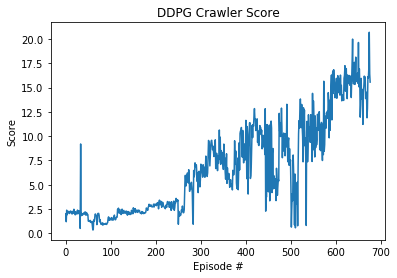

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("DDPG Crawler Score")
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()


In [8]:
env.close()